<a href="https://colab.research.google.com/github/andresmasegosa/Estadistica_GradoInformatica_UAL_18_19/blob/master/python/Day1%20/notebooks/students_ppls_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
Let's begin by installing and importing the modules we'll need.

In [1]:
!pip install -q --upgrade torch==2.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
!pip install -q --upgrade pyro-ppl graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 7.9 MB/s eta 0:00:00


In [24]:
import pyro
import torch
import pyro.distributions as dist
import numpy as np
import scipy.stats as stats

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions** (http://docs.pyro.ai/en/stable/distributions.html) :


Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

In [4]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).


In [5]:
sample = normal.sample()
sample

tensor(-1.1911)

In [6]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[ 0.1021, -1.1623, -0.7503,  2.3494, -0.5128],
         [ 0.4280, -1.2938, -0.3964,  0.4991,  0.8703],
         [ 0.3154, -1.7865, -1.0576,  1.0368,  2.0259],
         [ 0.1262, -0.1154,  1.1885,  1.2172, -1.5372]],

        [[-0.8953, -0.2783,  0.3968,  0.4088,  1.6652],
         [ 1.2866, -0.6486,  0.1925,  0.6183, -0.8225],
         [-0.7448,  1.4797,  0.1617, -1.4220, -1.7352],
         [ 0.6700,  0.2361, -1.7209,  2.0788,  1.0218]],

        [[-1.1210, -0.7011, -1.2648, -0.1347,  0.9089],
         [-0.6367, -0.4316, -1.0171,  0.9697, -1.7652],
         [ 0.5313,  1.4931,  0.1652, -1.7681,  0.3976],
         [-1.0963, -0.7144,  2.1527,  0.5010, -1.0222]]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We can query the **dimensionlity** of a tensor with the ``shape`` property

In [7]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Operations, like **log-likelihood**, are defined over tensors.

In [8]:
normal.log_prob(sample)

tensor([[[-0.9620, -1.2394, -1.1620, -1.0120, -0.9219],
         [-1.3306, -1.3836, -0.9214, -2.0680, -0.9263],
         [-0.9457, -0.9191, -0.9852, -0.9213, -1.2466],
         [-1.3409, -1.7378, -1.0463, -1.1732, -2.8217]],

        [[-1.0485, -3.1004, -0.9949, -0.9609, -1.0148],
         [-0.9192, -0.9782, -1.2106, -1.0160, -1.0587],
         [-1.8452, -0.9495, -1.0922, -1.5519, -1.7504],
         [-0.9297, -0.9361, -1.1082, -1.4058, -1.0968]],

        [[-0.9431, -0.9976, -0.9988, -0.9260, -1.0728],
         [-0.9568, -0.9206, -1.1278, -1.6846, -1.7901],
         [-0.9496, -0.9246, -0.9262, -2.2747, -2.0461],
         [-1.0246, -0.9319, -1.2625, -1.5917, -0.9241]]])

In [9]:
torch.sum(normal.log_prob(sample))

tensor(-74.3069)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise 1: Univariate Distributions</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.
* Create a Poission Distribution with rate equals to 2. Generate 100 samples and compute their log-likelihood.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

**Multiple distributions** can be embedded in single object.

* Below we define **three Normal distributions with different means but the same scale** in a single object.


In [10]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [11]:
normal.sample()

tensor([1.9586, 2.3339, 2.9598])

In [12]:
normal.log_prob(normal.sample())

tensor([-1.2129, -0.9562, -1.0711])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise 2: Multivariate Distributions</span>**

* Create a set of Poission Distributions with rate equals to [2, 3, 4].
*  Generate 100 samples from the joint distribution
*  Compute the log-likelihood of the generated samples.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models** (http://pyro.ai/examples/intro_part_i.html) :


* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model, where temperture is modeled using a random Normal variable.

In [13]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(17.4432)
tensor(17.0545)


See how the model behaves as a stochastic function, which **returns a different value everytime it is invoked**.

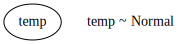

In [14]:
# Visualize the model
pyro.render_model(model, render_distributions=True)



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

In Pyro, a stochastic method is defined as a **composition of primitive stochastic functions**.

*The temperature Model:*
We consider the presence of a **temperature sensor**.
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.


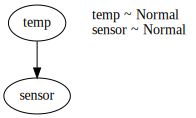

In [15]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

# Visualize the model
pyro.render_model(model, render_distributions=True)

In [16]:
# Sample from the model
out1 = model()
out1

(tensor(14.6953), tensor(13.7677))

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>



The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$




In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 3: Model with two temperature sensors</span>**

* Assume you have a room with two different temperature sensors.

* Create a Pyro model extending the previous one including a new random varible representing the other temperature sensor. The joint distribution factorizes as follows:

$$p(sensor1, sensor2, temp) = p(sensor1|temp)p(sensor2|temp)p(temp)$$


* Sample from this model and render the model

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

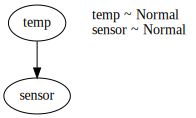

In [17]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

# Visualize the model
pyro.render_model(model, render_distributions=True)

# 3. **Pyro’s inference** (http://pyro.ai/examples/intro_part_ii.html) :

### Auxiliary inference functions (more details on Day 2)

To make inference on Pyro, we will use a variational inference method, which performs gradient-based optimization to solve the inference problem. More details will be given on Day 2.

In [18]:
# @title
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoNormal


def svi(model, obs, guide=None, num_steps = 500, plot = False, verbose=False, lr=0.01):

    torch.manual_seed(999)

    pyro.clear_param_store()

    if guide is None:
        guide = AutoNormal(model)

    svi = pyro.infer.SVI(model=model,
                         guide=guide,
                         optim=SGD({"lr": lr, "momentum":0.1}),
                         loss=Trace_ELBO())

    elbo, a,b  = [], [], []

    for t in range(num_steps):
        elbo.append(-svi.step(obs))
        if t%100==0:
            print('Step: '+str(t)+'. ELBO: ' +str(elbo[-1]))


    if (plot):
        plt.plot(elbo[2:])
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("ELBO");
        plt.show()

    if verbose:
        print("Inference results:")
        for name, value in pyro.get_param_store().items():
            print(name, pyro.param(name).item())

* To make inference in Pyro over a given model we need to define a *guide*. This *guide* must have the same signature as its counterpart model.

* The guide must provide samples for those variables of the model that are not observed, again using the ``pyro.sample`` construct.

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize over these parameters.

* All of this will be explained in detail on Day 2.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the posterior distribution over the real temperature.

This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

In [19]:
#The observatons
obs = {'sensor': torch.tensor(18.0)}

def model(obs):
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 0.1), obs=obs['sensor'])

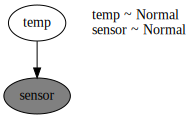

In [20]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. This allows us to query the **posterior probability distribution**:


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$



Step: 0. ELBO: -16147.421896100044
Step: 100. ELBO: -5.638109087944031
Step: 200. ELBO: -2.748673915863037
Step: 300. ELBO: -2.5427181720733643
Step: 400. ELBO: -2.9723092317581177


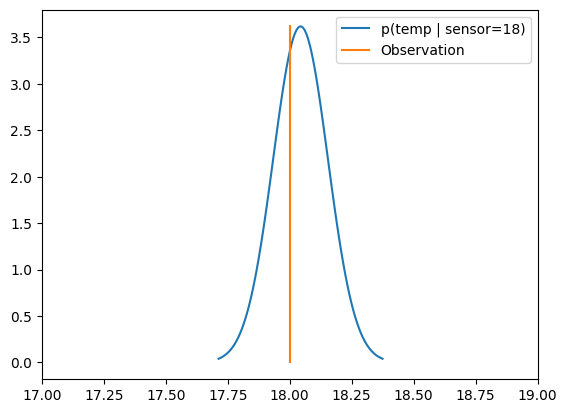

P(Temperature|Sensor=18.0) = 
Normal(loc: 18.043657302856445, scale: 0.11020330339670181)



In [27]:
#Run inference
svi(model,obs, plot=False)


mu = pyro.param("AutoNormal.locs.temp").item()
scale = pyro.param("AutoNormal.scales.temp").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='p(temp | sensor=18)')
point = obs["sensor"] # Previously calculated above
plt.plot([point, point],[0., np.max(stats.norm.pdf(x, mu, scale))], label='Observation')
plt.xlim(17,19)
plt.legend()
plt.show()


#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.temp").item(), pyro.param("AutoNormal.scales.temp").item()))
print("")


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 4: Changing the sensitivity of the sensor</span>**

* Change the sensitity of the sensor by changing the variance of the Normal random variable
*  Explore the effect in the postertior

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.2  Learning from a bunch of observations

* Let us assume that we have a **set of observations** of the temperature at different time steps.

* Following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation** using a standard ``for-loop``.


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

What if we do **not know the mean temperature**?

* We can **infer it from the data** by, e.g., using a **maximum likelihood** approach,
$$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \ln \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i, $$ where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$.

* The graphical model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="200">
</center>
* For now we do not consider the **underlying inference problem** We just define the model and let the **PPL's engine** make the work for us.

* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize.


In [32]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

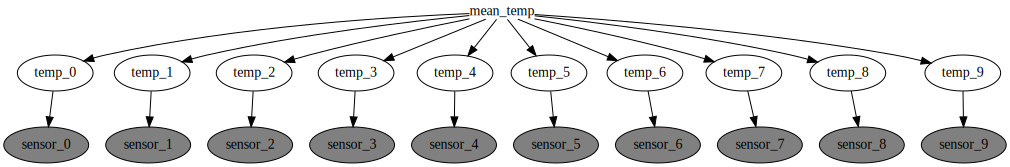

In [33]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_params=True)

In [34]:
#Run inference
svi(model, obs)

#Print results
print("Estimated Mean Temperature (MLE):")
mle_mean_temp = pyro.param("mean_temp").item()
print(mle_mean_temp)

Step: 0. ELBO: -2270.0551319122314
Step: 100. ELBO: -247.7783883213997
Step: 200. ELBO: -56.34299427270889
Step: 300. ELBO: -23.71842250227928
Step: 400. ELBO: -18.077348172664642
Estimated Mean Temperature (MLE):
19.568622589111328


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**:

* We treat the unknown quantity as a **random variable**.

This model can graphically be represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="200">
</center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>



In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We perform inference over this model:

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$


In [ ]:
import time

#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

---
* Observe that the result of the learning is **not a point estimate**.

* We have a **posterior distribution** which captures **uncertainty** about the estimation.

---

In [ ]:
import numpy as np
import scipy.stats as stats

mu = pyro.param("AutoNormal.locs.mean_temp").item()
scale = pyro.param("AutoNormal.scales.mean_temp").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior over $\mu$')
point = mle_mean_temp # Previously calculated above
plt.plot([point, point],[0., 1.], label='MLE point estimate of $\mu$')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

Pyro can exploit **conditional independencies and vectorization** to make inference much faster.

* This can be done with the construct **``plate``**.

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepdendent** from another variables $s_j$ and $t_j$ given $\mu_t$.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="200">
</center>


In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**.

We can here make a distinction between **local** and **global** random variables:

* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples).


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**.

In [ ]:
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 5: </span>The role of *prior distributions* in learning**

In this exercise we just want to illustrate how the output of learning depends of the particular prior we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

In [ ]:
#The observatons
sample_size = 10
obs = {'sensor': torch.tensor(np.random.normal(18,2,sample_size))}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, obs)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))

x = np.linspace(16, 20, 100)
plt.plot(x, stats.norm.pdf(x, pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.xlim(16,20)
plt.legend()
plt.show()


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# **4.  Icecream Shop**


We have an ice-cream shop and assume thaat we **record the ice-cream sales and the average temperature of the day** (using a temperature sensor).

* We know that **temperature affects the sales** of ice-creams.

* We want to **model** how temperature affects ice-cream sales.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/Ice-cream_shop_-_Florida.jpg" alt="Drawing" width=300 >
</center>



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We have **observations** from temperature and sales.

* Sales are modeled with a **Poisson** distribution:

>- The rate of the Poisson distribution **linearly depends of the real temperature**.

The figure below provides a graphical and probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model.png?raw=1" alt="Drawing" width=700>
</center>



In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


We again run the **(variational) inference engine** for estimating the posterior distributions.
* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.


In [ ]:
#Run inference
svi(model, obs, num_steps = 3000, lr = 0.001, plot=True)

#Print results
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### <span style="color:red">Exercise 6: Introduce Humidity in the Icecream shop model </span>
* Assume that we also have a bunch of **humidity sensor measurements**.
* Assume also that the **sales are also linearly influenced by the humidity**.

**Extend the previous model** with information about humidity measurements.

The figure provides a graphical and probabilistic specification of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model-Humidity.png?raw=1" alt="Drawing" width=900>
</center>




In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}


def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(80.0, 5.0))

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))

    ## Introduce a coefficient for the humidity "gamma" following a Normal distribution

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        #Add the 'humidity' variable and the 'sensor_humidity' variable. The distributions are Normal with fixed variance, but the mean parameter depends on the previously defined random variables. Look at the graph below for help.


        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp + ???)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.


In [ ]:
#Run inference
svi(model, obs, num_steps=3000, lr=0.001)

#Print results
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior Humidity Mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_humidity").item(), pyro.param("AutoNormal.scales.mean_humidity").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))
print("")
print("Posterior Gamma")
print(dist.Normal(pyro.param("AutoNormal.locs.gamma").item(), pyro.param("AutoNormal.scales.gamma").item()))


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# **5.  Icecream Shop**

If we believe there is a temporal dependency between the variables, we can also encode this in the model.

* E.g. the current **real temperature must be similar to the real temperature in the previous time step**.

* This temporal dependency can **be modeled** using a **for-loop** in Pyro

Consider the **graphical representation**.


<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/tempmodel-temporal-III.png" alt="Drawing" style="width: 350px;" >



In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])
        prev_temp = temp

#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [ ]:
import time

#Run inference
svi(model, obs, guide)

smooth_temp=[]
for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())

print('Finished')

We can now plot the **observered measurements** of the temperature **against** the inferred **real temperature**.

* By querying the **local hidden** we can **smooth** the temperature.

* The **recovered temperature** is much less noisy than the measured one.

In [ ]:
import matplotlib.pyplot as plt
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### <span style="color:red">Exercise 7:  Temporal Extension of the Iceacream shop model </span>

This exercise **extends** Excersise 6.
* Assume temperature depends of the **temperature in the previous day**.
* Assume humidity depends of the **humidity in the previous day**.
* Assume sales depends on the **current temperature and humidity**.
* Use the **graphical representation below for reference**.

N.b. The plate representation has to be impemented in Pyro using a **``for-loop``**.
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/icecream-model-temporal.png" alt="Drawing" width=700 >




In [ ]:
#The observatons
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}



def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(8.0, 2.0))


    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))

    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
            #Introduce the 'humidity' variable at time 0.

        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
            #Introduce the f'humidity_{i}' variable defining the transition

        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

        #Introduce the f'sensor_humidity_{i}' variable.

        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.01),alpha + beta*temp + ????)
        sales = pyro.sample(f'sales_{i}', dist.Poisson(rate), obs=obs['sales'][i])

        prev_temp = temp
        #Keep humidity for the next time step.
        prev_humidity = humidity


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']), constraint=constraints.positive)
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    humidity_mean = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(0.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(0.0))
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param(f'meanH_{i}', obs['sensor_humidity'][i])
        scaleH_i = pyro.param(f'scaleH_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        humidity_i = pyro.sample(f'humidity_{i}', dist.Normal(meanH_i, scaleH_i))

In [ ]:
import time

#Run inference
svi(model, obs, guide=guide, num_steps = 1000, lr=0.001)

smooth_temp=[]
smooth_humidity=[]

for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())
    smooth_humidity.append(pyro.param(f'meanH_{i}').item())

print('Finished')

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We can plot the observered measurements of the temperature against the **inferred real temperature** by our model.

* The **recovered temperature** is much less noisy than the real one.


In [ ]:
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

---
* We can plot the observered measurements of the humidity against the **inferred real humidity** by our model.

* The **recovered humidity** is much less noisy than the real one.

---


In [ ]:
humidity = torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])
plt.plot(humidity.detach().numpy(), label='Sensor Humidity')
plt.plot(smooth_humidity, label='Smooth Humidity')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>
